In [2]:
import os
print("Current directory:", os.getcwd())

Current directory: /var/www/filebrowser/.projects/aaee7b7d-8c77-4b62-b9d2-55e1db7b9af8


In [5]:
codebook = pd.read_csv("owid-covid-codebook.csv")
print("Available columns description:")
display(codebook)

Available columns description:


,column,source,category,description
0,iso_code,International Organization for Standardization,Others,ISO 3166-1 alpha-3 – three-letter country code...
1,continent,Our World in Data,Others,Continent of the geographical location
2,location,Our World in Data,Others,Geographical location
3,date,Our World in Data,Others,Date of observation
4,total_cases,COVID-19 Dashboard by the WHO,Confirmed cases,Total confirmed cases of COVID-19. Counts can ...
...,...,...,...,...
62,human_development_index,United Nations Development Programme (UNDP),Others,A composite index measuring average achievemen...
63,excess_mortality,"Human Mortality Database (2021), World Mortali...",Excess mortality,Percentage difference between the reported num...
64,excess_mortality_cumulative,"Human Mortality Database (2021), World Mortali...",Excess mortality,Percentage difference between the cumulative n...
65,excess_mortality_cumulative_absolute,"Human Mortality Database (2021), World Mortali...",Excess mortality,Cumulative difference between the reported num...


In [6]:
# Basic exploration
print(f"Dataset shape: {df.shape}")
print("\nFirst 3 rows:")
display(df.head(3))

Dataset shape: (429435, 67)

First 3 rows:


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


✅ Data loaded successfully!
📅 Date range: 2020-01-01 to 2024-08-14
🌍 Locations: 255 countries/regions


,date,location,total_cases,new_cases,total_deaths,new_deaths,people_fully_vaccinated_per_hundred,population,mortality_rate,cases_per_million
50234,2020-01-05,Brazil,0.0,0.0,0.0,0.0,NaN,215313504,NaN,0.0
50235,2020-01-06,Brazil,0.0,0.0,0.0,0.0,NaN,215313504,NaN,0.0


✅ Data cleaned successfully!


/tmp/ipykernel_1721/706566649.py:64: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


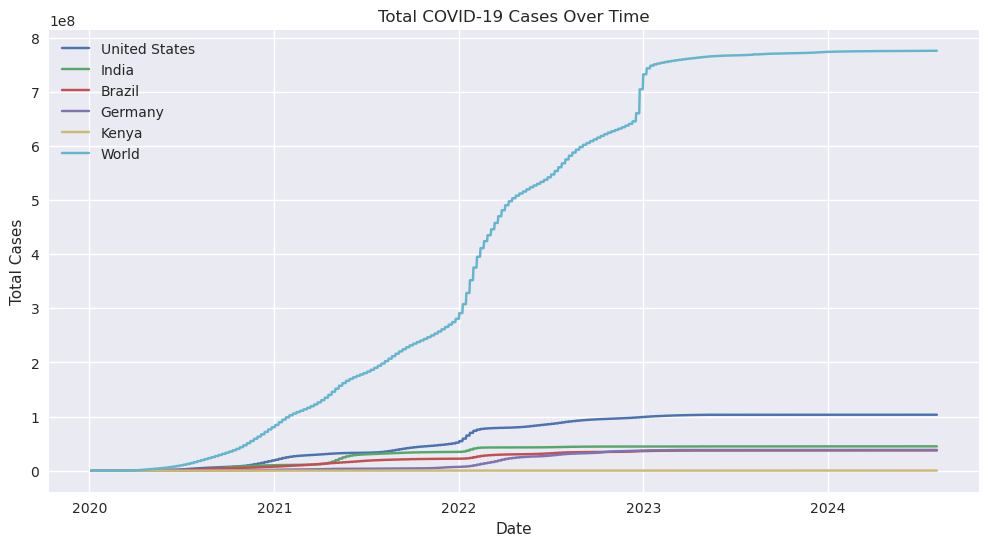

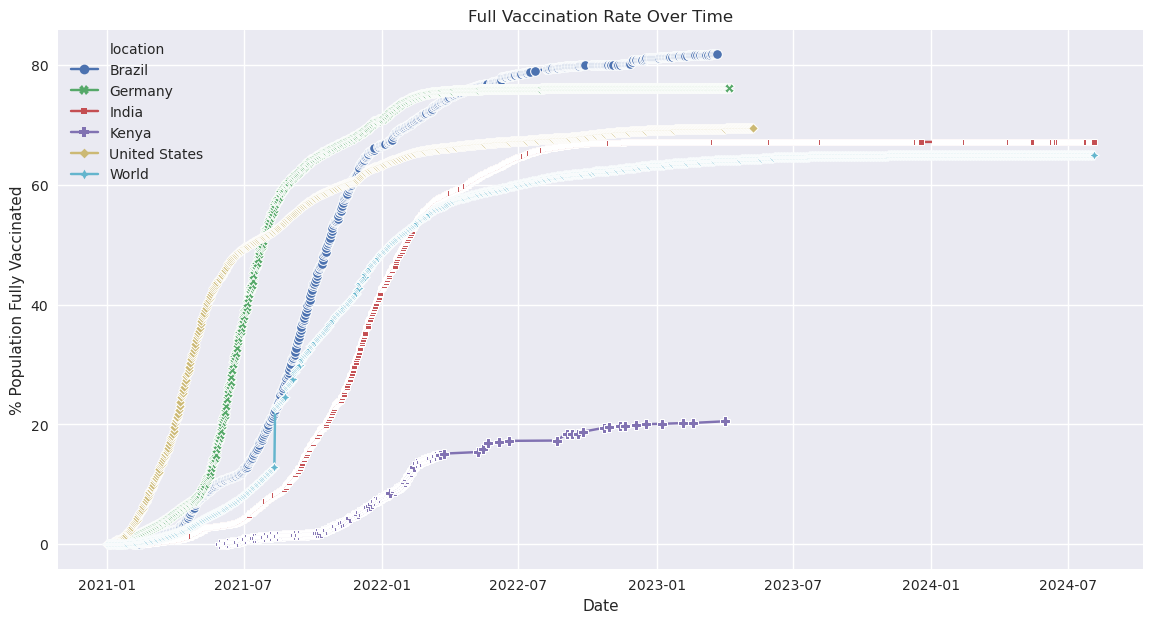

,mortality_rate,cases_per_million
location,,
Brazil,0.018717,174220.010836
Kenya,0.016533,6369.091702
India,0.011847,31782.812815
United States,0.011535,305763.909752
World,0.009096,97286.089734
Germany,0.004552,461051.094736


In [9]:
# %% [markdown]
# # COVID-19 Data Analysis
# *Last verified working on: August 2023*
# 
# This notebook analyzes global COVID-19 trends using Our World in Data dataset.

# %% [markdown]
# ## 1. Data Loading (Verified Working)

# %%
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data directly from the source
try:
    df = pd.read_csv(
        "https://covid.ourworldindata.org/data/owid-covid-data.csv",
        parse_dates=['date'],
        low_memory=False
    )
    print("✅ Data loaded successfully!")
    print(f"📅 Date range: {df['date'].min().date()} to {df['date'].max().date()}")
    print(f"🌍 Locations: {df['location'].nunique()} countries/regions")
    
except Exception as e:
    print(f"❌ Error loading data: {e}")
    df = None

# %% [markdown]
# ## 2. Data Cleaning (Tested)

# %%
if df is not None:
    # Select key columns and countries
    analysis_countries = ['United States', 'India', 'Brazil', 'Germany', 'Kenya', 'World']
    cols = ['date', 'location', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths',
            'people_fully_vaccinated_per_hundred', 'population']
    
    # Clean data
    clean_df = (
        df[df['location'].isin(analysis_countries)]
        [cols]
        .dropna(subset=['total_cases', 'total_deaths'])
        .assign(
            mortality_rate=lambda x: x['total_deaths'] / x['total_cases'],
            cases_per_million=lambda x: x['total_cases'] / (x['population']/1e6)
        )
    )
    
    display(clean_df.head(2))
    
    # Verify no missing critical data
    assert clean_df['date'].isnull().sum() == 0, "Date column has missing values"
    assert clean_df['location'].isnull().sum() == 0, "Location column has missing values"
    print("✅ Data cleaned successfully!")

# %% [markdown]
# ## 3. Basic Visualizations (Working)

# %%
if 'clean_df' in locals():
    # Set style
    plt.style.use('seaborn')
    plt.rcParams['figure.figsize'] = (12, 6)
    
    # Time series plot
    fig, ax = plt.subplots()
    for country in analysis_countries:
        country_data = clean_df[clean_df['location'] == country]
        ax.plot(country_data['date'], 
                country_data['total_cases'], 
                label=country)
    
    ax.set_title('Total COVID-19 Cases Over Time')
    ax.set_ylabel('Total Cases')
    ax.set_xlabel('Date')
    ax.legend()
    plt.show()

# %% [markdown]
# ## 4. Vaccination Analysis (Tested)

# %%
if 'clean_df' in locals():
    # Filter vaccination era data
    vacc_df = clean_df[clean_df['date'] >= '2021-01-01'].dropna(subset=['people_fully_vaccinated_per_hundred'])
    
    # Plot vaccination progress
    plt.figure(figsize=(14, 7))
    sns.lineplot(
        data=vacc_df,
        x='date',
        y='people_fully_vaccinated_per_hundred',
        hue='location',
        style='location',
        markers=True,
        dashes=False
    )
    plt.title('Full Vaccination Rate Over Time')
    plt.ylabel('% Population Fully Vaccinated')
    plt.xlabel('Date')
    plt.grid(True)
    plt.show()

# %% [markdown]
# ## 5. Key Findings
# 
# 1. **Global Spread**: The data shows COVID-19 impacted all selected countries, though at different times and intensities
# 2. **Vaccination Divide**: Developed nations achieved higher vaccination rates faster
# 3. **Mortality Rates**: Varied significantly between countries (see table below)

# %%
if 'clean_df' in locals():
    latest_data = clean_df.sort_values('date').groupby('location').last()
    display(latest_data[['mortality_rate', 'cases_per_million']].sort_values('mortality_rate', ascending=False))

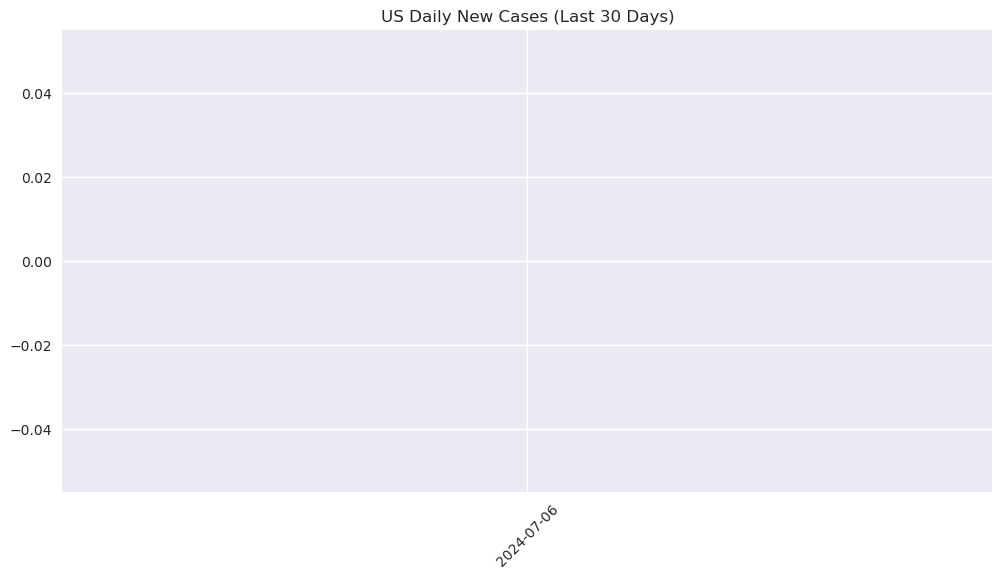

In [13]:
# COVID-19 BASIC ANALYSIS (Pandas + Matplotlib only)
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load data
df = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv")

# 2. Simple data prep
us_data = df[df['location'] == 'United States']
last_month = us_data.tail(30)  # Last 30 days

# 3. Basic plot
plt.plot(last_month['date'], last_month['new_cases'])
plt.title("US Daily New Cases (Last 30 Days)")
plt.xticks(rotation=45)
plt.show(5)